In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk

plt.style.use("ggplot")

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE, SpectralEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/jaxonmcneil/The-NeedleDrop/main/needledrop_data.csv')
df.describe()

,score,year,track count,duration,# artists mean,danceability mean,energy mean,speechiness mean,acousticness mean,instrumentalness mean,liveness mean,valence mean,duration_ms mean,duration mean,end_of_fade_in mean,start_of_fade_out mean,loudness mean,tempo mean,tempo_confidence mean,time_signature mean,time_signature_confidence mean,key mean,key_confidence mean,mode mean,mode_confidence mean,# artists std,danceability std,energy std,speechiness std,acousticness std,instrumentalness std,liveness std,valence std,duration_ms std,duration std,end_of_fade_in std,start_of_fade_out std,loudness std,tempo std,tempo_confidence std,time_signature std,time_signature_confidence std,key std,key_confidence std,mode std,mode_confidence std,# artists 50%,danceability 50%,energy 50%,speechiness 50%,acousticness 50%,instrumentalness 50%,liveness 50%,valence 50%,duration_ms 50%,duration 50%,end_of_fade_in 50%,start_of_fade_out 50%,loudness 50%,tempo 50%,tempo_confidence 50%,time_signature 50%,time_signature_confidence 50%,key 50%,key_confidence 50%,mode 50%,mode_confidence 50%
count,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1.752000e+03,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1734.000000,1734.000000,1734.000000,1734.000000,1.734000e+03,1734.000000,1734.000000,1734.000000,1.734000e+03,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1.752000e+03,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000
mean,6.421233,2013.517694,12.048516,2902.494076,1.199533,0.492897,0.656509,0.115328,0.237872,0.255865,0.212202,0.373163,2.575961e+05,257.596065,0.771608,249.190174,-8.077155,120.526380,0.376824,3.881605,0.849154,5.241678,0.457601,0.616485,0.474787,0.182035,0.121543,0.154581,0.065934,1.950254e-01,0.174976,0.137920,0.176650,7.742511e+04,77.425114,1.228463,76.016809,2.277445,28.198820,0.238950,0.346250,0.188080,3.536770,0.238990,0.456366,0.167463,1.148402,0.497342,0.674201,0.101773,0.192427,0.227619,0.171947,0.363489,2.523234e+05,252.323349,0.285836,244.010687,-7.649613,119.016442,0.359525,3.978596,0.916995,5.253139,0.468967,0.729452,0.483130
std,1.648621,5.610499,4.507680,1118.364351,0.456323,0.157426,0.170257,0.091404,0.209671,0.283237,0.082452,0.158941,1.326431e+05,132.643104,3.456197,129.504795,3.060749,12.557208,0.155295,0.192878,0.123040,1.257565,0.100311,0.198314,0.079872,0.335546,0.040076,0.063530,0.058840,1.115318e-01,0.139434,0.065809,0.061282,6.395488e+04,63.954879,1.740141,63.383351,1.432866,8.282058,0.066045,0.323266,0.095862,0.638700,0.054306,0.107853,0.043990,0.469465,0.166597,0.188497,0.093043,0.241046,0.327795,0.088098,0.177763,1.311761e+05,131.176086,3.386577,128.080081,2.997944,16.456891,0.199418,0.151043,0.130053,2.053953,0.117232,0.422632,0.085926
min,0.000000,1965.000000,1.000000,34.920270,1.000000,0.099967,0.020050,0.027800,0.000001,0.000000,0.064100,0.031150,3.492000e+04,34.920270,0.000000,34.920270,-28.291250,71.905500,0.009000,1.500000,0.093000,0.000000,0.000000,0.000000,0.120000,0.000000,0.002121,0.001188,0.000377,6.041373e-07,0.000000,0.005033,0.001300,7.071068e+02,0.707107,0.000000,1.469509,0.033234,0.031113,0.007958,0.000000,0.000000,0.000000,0.036520,0.000000,0.024550,1.000000,0.086400,0.019700,0.027100,0.000001,0.000000,0.064100,0.032250,3.492000e+04,34.920270,0.000000,34.920270,-28.022500,71.015500,0.009000,1.000000,0.093000,0.000000,0.000000,0.000000,0.120000
25%,5.000000,2012.000000,10.000000,2319.306620,1.000000,0.382405,0.550096,0.048453,0.081360,0.010788,0.153986,0.258781,2.006982e+05,200.698324,0.178121,193.996025,-9.489615,112.418487,0.266

In [4]:
df.dropna(axis=0, inplace=True)
sum(df.isnull().sum())

0

In [5]:
targets = df['score']
features = df.drop(['score'], axis=1)

Next we remove any columns that are clearly unnecessary to our Machine Learning model. 

In [6]:
features.columns

Index(['id', 'album', 'artists', 'year', 'track count', 'duration',
       '# artists mean', 'danceability mean', 'energy mean',
       'speechiness mean', 'acousticness mean', 'instrumentalness mean',
       'liveness mean', 'valence mean', 'duration_ms mean', 'duration mean',
       'end_of_fade_in mean', 'start_of_fade_out mean', 'loudness mean',
       'tempo mean', 'tempo_confidence mean', 'time_signature mean',
       'time_signature_confidence mean', 'key mean', 'key_confidence mean',
       'mode mean', 'mode_confidence mean', '# artists std',
       'danceability std', 'energy std', 'speechiness std', 'acousticness std',
       'instrumentalness std', 'liveness std', 'valence std',
       'duration_ms std', 'duration std', 'end_of_fade_in std',
       'start_of_fade_out std', 'loudness std', 'tempo std',
       'tempo_confidence std', 'time_signature std',
       'time_signature_confidence std', 'key std', 'key_confidence std',
       'mode std', 'mode_confidence std', '# arti

In [7]:
remove = ['id', 'album', 'artists','# artists mean', 'duration_ms mean', 'duration mean',
       'end_of_fade_in mean', 'start_of_fade_out mean', 'tempo_confidence mean',
       'time_signature_confidence mean', 'key_confidence mean',
       'mode_confidence mean', '# artists std',
       'duration_ms std', 'duration std', 'end_of_fade_in std',
       'start_of_fade_out std',
       'tempo_confidence std',
       'time_signature_confidence std', 'key_confidence std',
       'mode_confidence std', '# artists 50%', 'danceability 50%',
       'energy 50%', 'speechiness 50%', 'acousticness 50%',
       'instrumentalness 50%', 'liveness 50%', 'valence 50%',
       'duration_ms 50%', 'duration 50%', 'end_of_fade_in 50%',
       'start_of_fade_out 50%', 'loudness 50%', 'tempo 50%',
       'tempo_confidence 50%', 'time_signature 50%',
       'time_signature_confidence 50%', 'key 50%', 'key_confidence 50%',
       'mode 50%', 'mode_confidence 50%']

In [8]:
features = features.drop(labels=remove, axis=1, )
features.describe()

,year,track count,duration,danceability mean,energy mean,speechiness mean,acousticness mean,instrumentalness mean,liveness mean,valence mean,loudness mean,tempo mean,time_signature mean,key mean,mode mean,danceability std,energy std,speechiness std,acousticness std,instrumentalness std,liveness std,valence std,loudness std,tempo std,time_signature std,key std,mode std
count,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1.734000e+03,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000
mean,2013.476932,12.163206,2926.966776,0.491651,0.656593,0.114855,0.238309,0.255436,0.212918,0.372368,-8.078828,120.571229,3.882106,5.258028,0.615387,0.121543,0.154581,0.065934,1.950254e-01,0.174976,0.137920,0.176650,2.277445,28.198820,0.346250,3.536770,0.456366
std,5.616447,4.387388,1095.085087,0.156313,0.169922,0.090419,0.209439,0.282156,0.082156,0.157854,3.063509,12.244409,0.190056,1.209225,0.193742,0.040076,0.063530,0.058840,1.115318e-01,0.139434,0.065809,0.061282,1.432866,8.282058,0.323266,0.638700,0.107853
min,1965.000000,2.000000,289.249960,0.099967,0.020050,0.027800,0.000001,0.000000,0.070900,0.031150,-28.291250,71.905500,1.500000,1.000000,0.000000,0.002121,0.001188,0.000377,6.041373e-07,0.000000,0.005033,0.001300,0.033234,0.031113,0.000000,0.000000,0.000000
25%,2012.000000,10.000000,2340.875945,0.381930,0.550106,0.048465,0.081895,0.011121,0.155253,0.258442,-9.489955,112.487920,3.800000,4.466667,0.500000,0.095637,0.111668,0.018204,1.067227e-01,0.023702,0.089744,0.139767,1.306111,23.393649,0.000000,3.204700,0.440959
50%,2014.000000,11.000000,2745.606465,0.500065,0.669463,0.075486,0.185453,0.138965,0.196421,0.376724,-7.638000,120.196613,3.928571,5.224747,0.625000,0.119506,0.148905,0.044745,2.098288e-01,0.185116,0.129251,0.178442,1.956574,28.412708,0.316228,3.594090,0.495595
75%,2016.000000,14.000000,3351.673867,0.607068,0.776211,0.154938,0.342662,0.446337,0.255924,0.484865,-5.970065,128.614193,4.000000,6.000000,0.750000,0.145452,0.197990,0.105920,2.813277e-01,0.300376,0.182590,0.218969,2.889782,33.399517,0.500000,3.951548,0.516398
max,2020.000000,50.000000,12023.493360,0.899250,0.996625,0.524000,0.978000,0.963700,0.883143,0.863500,0.942625,174.759400,4.500000,10.571429,1.000000,0.332150,0.417152,0.420260,5.132613e-01,0.652660,0.443535,0.369338,15.144492,60.745623,1.685426,6.363961,0.707107


In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=0)
print(len(X_train))
print(len(y_train))

1387
1387


1387
1387
(1387, 27)
(1387,)
(1387, 10)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

ValueError: ignored

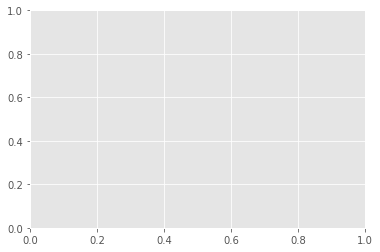

In [18]:
lda = LinearDiscriminantAnalysis()
lda_embedding = lda.fit_transform(X_train, y_train)
#raise NotImplementedError()
print(len(lda_embedding))
print(len([0]*len(lda_embedding)))
print(X_train.shape)
print(y_train.shape)
print(lda_embedding.shape)
print([0]*len(lda_embedding))
plt.scatter(lda_embedding, [0]*len(lda_embedding), c=y_train)
plt.yticks([])
plt.title("LDA Embedding")
plt.show()

In [34]:
lda_train = lda.fit_transform(X_train, y_train)
lda_test = lda.fit_transform(X_test, y_test)
lda_lr = LinearRegression().fit(lda_train, y_train)
lr = LinearRegression().fit(X_train, y_train)
#print("F1 Score: ",  f1_score(y_test, lda_lr.predict(X_test)))
f1_score(y_train, lda_lr.predict(X_test))

ValueError: ignored